In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use("seaborn")

## Data PreParation and Visulization

In [17]:
mean_01=[1,1]
cov_01=[[3,0.3],[0.3,2]]

mean_02=[6,2]
cov_02=[[2.5,-0.4],[-0.4,3]]

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


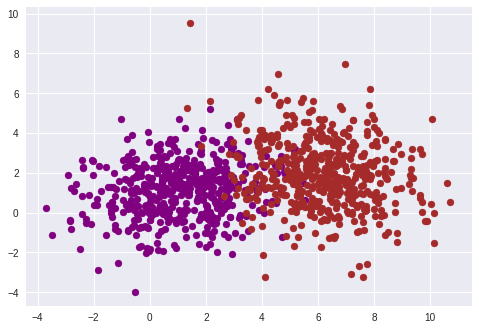

In [18]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color="purple")
plt.scatter(dist_02[:,0],dist_02[:,1],color="brown")
plt.show()

In [25]:
dataset=np.zeros((dist_01.shape[0]+dist_02.shape[0],dist_01.shape[1]+1))
dataset[:dist_01.shape[0],:-1]=dist_01
dataset[dist_01.shape[0]:,:-1]=dist_02
dataset[dist_01.shape[0]:,-1:]=1
print(dataset.shape)
dataset[:3]

(1000, 3)


array([[2.90853179, 3.2085175 , 0.        ],
       [1.86780608, 4.13147227, 0.        ],
       [1.60868163, 1.51846711, 0.        ]])

In [26]:
np.random.shuffle(dataset)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset[:,:-1],dataset[:,-1:])
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(750, 2) (750, 1) (250, 2) (250, 1)


## Implementation Logistic Regression 

In [36]:
class LogisticRegression:
    def __init__(self,x,y):
        self.X=x
        self.Y=y
        self.coef=np.random.uniform(low=-1,high=1,size=(x.shape[1],))
        self.bias=np.random.random
    
    @staticmethod    
    def sigmoid(y):
        return 1/(1+np.exp(-y))
    
    def hypothesis(self,x):
        return LogisticRegression.sigmoid(x.dot(self.coef)+self.bias)
    
    def Predict(self,x):
        y_cap=self.hypothesis(x)
        if y_cap<0.5:
            return 0
        else: return 1
    
    def Compute_Loss(self):
        loss=0
        for x,y in zip(self.X,self.Y):
            y_cap=self.hypothesis(x)
            prob_loss=y*np.log(y_cap+1e-03)+(1-y)*np.log(1-y_cap+1e-03)
            loss+=prob_loss
            
        return (-loss)
    def accuracy(self,x_test,true_lables):
        pred=[]
        for x in x_test:
            pred.append(self.Predict(x))
            
        return np.sum(np.array(pred)==true_lables)/np.array(pred).shape[0]
    
    def Calculate_Gradient(self,alpha=0.01):
        grad_0=0
        theta=np.zeros_like(self.coef)
        
        for xi ,yi in zip(self.X,self.Y):
            theta+=(self.hypothesis(xi)-yi)*xi
            grad_0+=(self.hypothesis(xi)-yi)
            
        #Update Weight
        self.coef-=alpha*theta
        self.bias-=alpha*grad_0
        
    def train(self,losses,iteration=1,alph=0.1):
        for _ in range(iteration):
            self.Calculate_Gradient(alpha)
            losses.append(self.Compute_Loss())
            
        return losses

## Training Our Model